# ML in Cybersecurity: Project II

## Team
  * **Team name**:  *Watchers on the wall*
  * **Members**:  
  * **Chirag Bhuvaneshwara(s8chbhuv@stud-uni.saarland.de), 2571703** 
  * **Vedika Agarwal (s8veagar@stud-uni.saarland.de), 2571203** 
  * **Kushboo Mehra (s8khmehr@stud.uni-saarland.de), 2576512**
  * **Tutor**: *Tribuhu*


## Logistics
  * **Due date**: 9th December 2018, 23:59:59 (to email the completed notebook to your respective tutors). We deduct 25% points for late submissions.
  * Complete this in the previously established **teams of 3**
  * Each team will be assigned a tutor. Mail the notebook (**do NOT share a link**) to the respective TAs before the due date.
  
  
## Timeline
  * 19-Nov-2018: Project 2 hand-out
  * **09-Dec-2018** (23:59:59): Email completed notebook to respective TAs
  * **10-Dec-2018** (12:15-14:00, regular tutorial slot): Teams present their projects
  * 17-Dec-2018 (12:15-14:00, regular tutorial slot): Project 2 discussion and summary
  
  
## About this Project
In this project, we dive into the vulnerabilities of machine learning models and the difficulties of defending them. To this end, we require you to implement an evasion attack (craft adversarial examples) yourselves, and defend your own model.   


## A Note on Grading
The total number of points in this project is 100. We further provide the number of points achievable with each excercise. You should take particular care to document and visualize your results, though.
 
We will evaluate this criteria in a presentation as for project 1. This will be during the regular tutorial slot on 10th December 12:00-14:00 (same location as last time). In case you have time restrictions during the time of the tutorial, notify us asap!  You can present on your laptops.
 
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with (all!) your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v1.0: Initial notebook
 
  ---

In [1]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt 

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

In [2]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from random import randint

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_classification


import numpy as np
from keras import backend
from keras.models import load_model
import tensorflow as tf
import random

from cleverhans.attacks import FastGradientMethod
from cleverhans.attacks import BasicIterativeMethod
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import SaliencyMapMethod
from cleverhans.attacks import BasicIterativeMethod
from cleverhans.attacks import CarliniWagnerL2
from cleverhans.attacks import ElasticNetMethod

from keras.models import load_model
# In case you want to use neural networks, we only support sklearn and keras (With a tensorflow backend).

C:\Users\Chirag Bhuvaneshwara\Documents\Softwares\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [3]:
def identity_func(foo):
    return foo


def rawData(dataSet, labels, random_state):  # Gets the 1000 random images from mnist train set
    
    rawdata = np.array([]).reshape(0,28,28)
    rawlabels = np.array([])
    
    random.seed(random_state)
    
    needed = random.sample(range(1, 60000), 1000)
    
    for i in needed:
        rawdata =  np.r_[rawdata, [dataset[i,:,:]]]
        rawlabels =  np.r_[rawlabels, [labels[i]]]
        
    return (rawdata, rawlabels)

def randImgs(digit, x_train, y_train, random_state, max_count = 1): # Gets 1 adversarial image for 1 label for plotting
    """
    digit: one from the 0 - 9 MNIST classes
    x_train: Training data
    y_train: Corresponding labels
    max_count: required no. of images of the digit, assumed to be even
    """
    rand_samples = []
    random.seed(random_state)
    
    count = 0
    while count < max_count:

        index = random.randint(1,1000)

        if y_train[index] == digit:
            rand_samples += [(x_train[index].reshape(28,28))]
            count += 1

    return rand_samples
    
    
def plot_samples(samples): 
    
    n = len(samples)
    for i in range(1, n):
        
        plt.subplot(n/2,n/2,i)
        plt.imshow(samples[i])

def randSetImgs(dataset, labels, random_state): # Gets 1 adversarial image for each label for plotting
    
    rand_samples = []
    for digit in range(0,10):
        rand_samples += randImgs(digit, dataset, labels, random_state)
    
    return rand_samples

# 1. Attacking an ML-model

In this section, we implement an attack ourselves. We then leverage the Cleverhans library to craft adversarial examples. First, however, you need a model you can attack. Feel free to choose the DNN/ConvNN from your last project.

Hint: you might want to save the trained model to save time later.

### 1.1.1: Setting up the model (5 Points)

Re-use the model from your last project here and train it until it achieves reasonable accuracy (>92%).

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from random import randint

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(0)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train.shape = {},  y_train.shape = {}'.format(x_train.shape, y_train.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

x_train_plt = x_train
y_train_labels=y_train

im_size = 784 # 28 x 28
# building the input vector from the 28x28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data to help with the training
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices with one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train.shape = {},  y_train.shape = {}'.format(x_train.shape, y_train.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 0.05
# Resample x_[], y_[]

batch_size=128
epochs_exp=10
epochs_full=50

def build_model(params,opt='adam'):
  model = Sequential()
  k=(params['kernel_size'],params['kernel_size'])
  p=(params['pool'],params['pool'])
  c=params['conv']
  model.add(Conv2D(c, k, activation='relu',padding='same', input_shape=x_train.shape[1:]))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=p))
  model.add(Conv2D(c*2, k ,activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1))
  model.add(MaxPooling2D(pool_size=p))
  model.add(Dropout(params['drop1'])) 

  model.add(Flatten())
  model.add(Dense(params['fc_size'], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(params['drop2']))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=params['lr']), metrics=['accuracy'])
  
  return model

def train(model, batch_size=128, epochs=5):
#   model.summary()
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=True)
  return history

def evaluate(model):
  loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  print('Test loss: ',loss)
  print('Test accuracy: ',accuracy)



x_train.shape = (60000, 28, 28),  y_train.shape = (60000,)
x_test.shape = (10000, 28, 28),  y_test.shape = (10000,)
x_train.shape = (60000, 28, 28, 1),  y_train.shape = (60000, 10)
x_test.shape = (10000, 28, 28, 1),  y_test.shape = (10000, 10)


In [5]:
# params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1':0.25, 'drop2':0.25}
# m = build_model(params)
# h = train(m,epochs=10)


In [6]:
# m.save('khush_model.h5')  # creates a HDF5 file 
# del m  # deletes the existing model# params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1':0.25, 'drop2':0.25}
# m = build_model(params)
# h = train(m,epochs=10)


In [7]:
keras.backend.set_learning_phase(False)

# returns a compiled model
model = load_model('khush_model.h5')

### 1.1.2: Implementing an attack (20 Points)

We now want you to attack the model trained in the previous step. You are free to choose any attack from the lecture, or implement your own idea. Take into account that the attacker is stealhy and wants to remain undetected: introduce a small change only! To test your attack, craft one adversarial example for the first occurence of each digit class in the training data.

In [8]:
#
#
# ------- Your Code -------
#
#

### 1.1.3: Visualizing the results (5 Points)

Please visualize the ten adversarial examples you crafted in the previous step.

In [9]:
#
#
# ------- Your Code and plots-------
#
#

### 1.2.1: Using libraries for attacks (20 Points)
As the field of evasion attacks (in particular for DNN) is very active research field, several libraries have been published that contain attacks. We will work here with the CleverHans (https://github.com/tensorflow/cleverhans) library. Please implement FGSM and another attack of your choice using this library. Please plot for both attacks the resulting adversarial examples as before, craft however a bigger set of at least 1,000 examples using FGSM. 

In [10]:
(dataset, labels), (x, y) = mnist.load_data()

# Use the same seed to get the same set of 1000 images from 'dataset' variable
seed = 27

(raw_data, raw_labels) = rawData(dataset, labels, seed)

In [11]:
# renaming
x_validation = raw_data.reshape(1000,28,28,1)
y_validation = raw_labels

In [12]:
# Set TF random seed to improve reproducibility
tf.set_random_seed(1234)

# Retrieve the tensorflow session
sess =  backend.get_session()

In [13]:
# Evaluate the model's accuracy on the 1000 images we are taking from training set 0f 60000 images
x_validation = x_validation.astype('float32')
x_validation /= 255

pred = np.argmax(model.predict(x_validation), axis = 1)
acc =  np.mean(np.equal(pred, y_validation))

print("The normal validation accuracy is: {}".format(acc))

The normal validation accuracy is: 0.995


In [ ]:
# Initialize the Fast Gradient Sign Method (FGSM) attack object and 
# use it to create adversarial examples as numpy arrays.
wrap = KerasModelWrapper(model)
fgsm = FastGradientMethod(wrap, sess=sess)

fgsm_params = {'eps': 0.3,
               'clip_min': 0.,
               'clip_max': 1.}

adv_x = fgsm.generate_np(x_validation, **fgsm_params)

adv_pred = np.argmax(model.predict(adv_x), axis = 1)
adv_acc =  np.mean(np.equal(adv_pred, y_validation))

print("The adversarial validation accuracy for FGSM is: {}".format(adv_acc))

[INFO 2019-02-02 03:41:34,700 cleverhans] Constructing new graph for attack FastGradientMethod


The adversarial validation accuracy for FGSM is: 0.104


In [ ]:
# Initialize the Basic Iterative Method (BIM) attack object and 
# use it to create adversarial examples as numpy arrays.
wrap = KerasModelWrapper(model)
bim = BasicIterativeMethod(wrap, sess=sess)

bim_params = {'eps': np.float32(0.3),
              'eps_iter': 0.03,
              'nb_iter': 10,
              'clip_min': 0.,
              'clip_max': 1.}

adv_x2 = bim.generate_np(x_validation, **bim_params)

adv_pred2 = np.argmax(model.predict(adv_x2), axis = 1)
adv_acc2 =  np.mean(np.equal(adv_pred2, y_validation))

print("The adversarial validation accuracy for BIM is: {}".format(adv_acc2))


[INFO 2019-02-02 03:42:07,674 cleverhans] Constructing new graph for attack BasicIterativeMethod


### 1.2.2: Visualizing the results (10 Points)
As before, please plot the results from the previous steps. Compare the results to your own attack. Which differences do you observe between the attacks? Why?

In [ ]:
seed = 150

#True images
trueImgs = randSetImgs(x_validation, y_validation, seed)
advImgs = randSetImgs(adv_x.reshape(1000,28,28), y_validation, seed)
adv2Imgs = randSetImgs(adv_x2.reshape(1000,28,28), y_validation, seed)

In [ ]:
trueImgs.shape

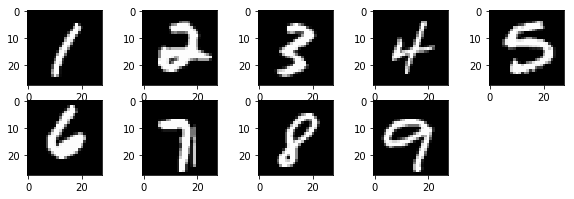

In [18]:
plot_samples(trueImgs)

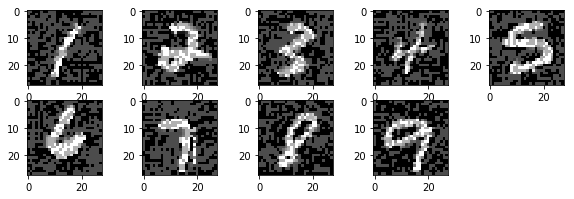

In [19]:
# FGSM adversarial results
plot_samples(advImgs)

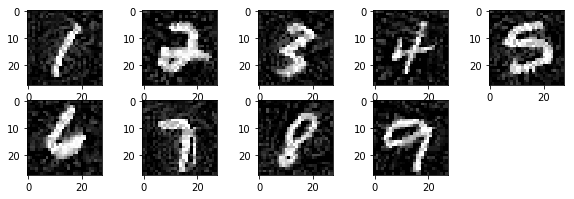

In [20]:
# BIM adversarial results
plot_samples(adv2Imgs)


# 2. Defending an ML model

So far, we have focused on attacking an ML model. In this section, we want you to defend your model. As before concerning the attack, you can chose an example from the lecture, or experiment with any idea you have.

We do not require the defense to work perfectly - but what we want you to understand is why it works or why it does not work.

### 2.1: Implementing a defense of your choice (25 Points)
As stated before, feel free to implement a defense or mitigation of your choice. Evaluate the defense on all adversarial examples you obtained from previous steps of this project and report the results.

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

adv_x_train = adv_x.reshape(1000,28,28)[0:900]
adv_x2_train = adv_x.reshape(1000,28,28)[0:900]

adv_y_train = y_validation[0:900]
adv_y2_train = y_validation[0:900]

adv_x_test = adv_x.reshape(1000,28,28)[900:]
adv_x2_test = adv_x2.reshape(1000,28,28)[900:]

adv_y_test = y_validation[900:]
adv_y2_test = y_validation[900:]

In [22]:
new_x_train = np.concatenate((x_train,adv_x_train, adv_x2_train), axis=0)
new_y_train = np.concatenate((y_train, adv_y_train, adv_y2_train), axis=0)

new_x_test = np.concatenate((x_test,adv_x_test, adv_x2_test), axis=0)
new_y_test = np.concatenate((y_test,adv_y_test,adv_y2_test), axis=0)

In [23]:
new_x_test.shape

(10200, 28, 28)

In [24]:
x_train = new_x_train.reshape(61800,28,28,1)
x_test = new_x_test.reshape(10200,28,28,1)

# Convert class vectors to binary class matrices with one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(new_y_train, num_classes)
y_test = keras.utils.to_categorical(new_y_test, num_classes)

In [26]:
params={'conv': 32, 'fc_size': 128, 'kernel_size': 3, 'lr': 0.001, 'pool': 2, 'drop1':0.25, 'drop2':0.25}
m = build_model(params)
h = train(m,epochs=4)

Train on 49440 samples, validate on 12360 samples
Epoch 1/4
49440/49440 [==============================] - 1183s 24ms/step - loss: 0.2307 - acc: 0.9468 - val_loss: 2.0825 - val_acc: 0.8528
Epoch 2/4
49440/49440 [==============================] - 1217s 25ms/step - loss: 0.0473 - acc: 0.9870 - val_loss: 2.0027 - val_acc: 0.8571
Epoch 3/4
49440/49440 [==============================] - 1227s 25ms/step - loss: 0.0351 - acc: 0.9904 - val_loss: 2.1554 - val_acc: 0.8580
Epoch 4/4
49440/49440 [==============================] - 1227s 25ms/step - loss: 0.0283 - acc: 0.9916 - val_loss: 2.1562 - val_acc: 0.8567


In [27]:
m.save('khush_ADV_model.h5')  # creates a HDF5 file 

In [28]:
keras.backend.set_learning_phase(False)

# returns a compiled model
model = load_model('khush_ADV_model.h5')

In [30]:
pred = np.argmax(model.predict(new_x_test.reshape(10200,28,28,1)), axis=1)
acc =  np.mean(np.equal(pred, new_y_test))

print("New test set: 10000 images from mnist test + 200 adversarial images from FGSM & BIM(100 each)")
print("The test accuracy on test set with adverasial images is: {}".format(acc))

New test set: 10000 images from mnist test + 200 adversarial images from FGSM & BIM(100 each)
The test accuracy on test set with adverasial images is: 0.9727450980392157


In [31]:
onlyAdv_x_test = np.concatenate((adv_x_test, adv_x2_test), axis=0)
onlyAdv_y_test = np.concatenate((adv_y_test,adv_y2_test), axis=0)

pred = np.argmax(model.predict(onlyAdv_x_test.reshape(200,28,28,1)), axis=1)
acc =  np.mean(np.equal(pred, onlyAdv_y_test))

print("Only adversarial test set: 200 adversarial images from FGSM & BIM(100 each)")
print("The test accuracy on just the adverasial images is: {}".format(acc))

Only adversarial test set: 200 adversarial images from FGSM & BIM(100 each)
The test accuracy on just the adverasial images is: 0.16


### 2.2: Conclusions (15 Points)
Please interpret the results of your defense here. What did you try to make the classifier more robust? Why did it work? Is the classifier now robust?

Feel free to state any interesting finding you encountered during this project.

We formed the training set for adversarial training from the 60000 train images from MNIST and the 1800 perturbed images we obtained from FGSM and BIM (900 from each). Ideally, we should have obtained perturbed images for all of the 60000 train images. 

We formed the test set with 10000 test images from mnist and 200 perturbed images from FGSM and BIM.

We ran the model only for 4 epochs when performing adversarial training due to time constraints.

With just this small addition to the dataset and just 4 epochs the  the accuracy increases from .104(FGSM) and .005(BIM) to .16(on both FGSM and BIM adversaries combined). This makes the classifier more robust.

We realize that this could have been done for the entire dataset - so have 60k adverserally perturbed images- and to make it more robust- people can make adverserial pertubations using FGSM, BIM, Projected Gradient Descent method and so on. Doing this would make our classifier more robust.